In [44]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
from read_data import *

%matplotlib inline

In [70]:
path_to_data = '../outputs/convergence_tests/tilt45_outer/shortest/'
path_suffix = '/output_'
prefixes = ['n50','n100','n200','n400','n800','n1600']
first = 0
last  = 11
HoR = 1e-3

data_dict = dict()
for pref in prefixes:
    print "Unpacking simulation %s..." % pref
    path_name = path_to_data + pref + path_suffix
    filenames = get_fn_list(path_name,first,last)
    tmp_data = []
    for i,fn in enumerate(filenames):
        print "Loading file %d..." % i
        tmp_data.append(build_table(fn,HoR))
    data_dict[pref] = tmp_data

Unpacking simulation n50...
Loading file 0...
Loading file 1...
Loading file 2...
Loading file 3...
Loading file 4...
Loading file 5...
Loading file 6...
Loading file 7...
Loading file 8...
Loading file 9...
Loading file 10...
Loading file 11...
Unpacking simulation n100...
Loading file 0...
Loading file 1...
Loading file 2...
Loading file 3...
Loading file 4...
Loading file 5...
Loading file 6...
Loading file 7...
Loading file 8...
Loading file 9...
Loading file 10...
Loading file 11...
Unpacking simulation n200...
Loading file 0...
Loading file 1...
Loading file 2...
Loading file 3...
Loading file 4...
Loading file 5...
Loading file 6...
Loading file 7...
Loading file 8...
Loading file 9...
Loading file 10...
Loading file 11...
Unpacking simulation n400...
Loading file 0...
Loading file 1...
Loading file 2...
Loading file 3...
Loading file 4...
Loading file 5...
Loading file 6...
Loading file 7...
Loading file 8...
Loading file 9...
Loading file 10...
Loading file 11...
Unpacking sim

simulaton n800 at time 5.000079e+07 r_g/c
simulaton n1600 at time 5.000011e+07 r_g/c


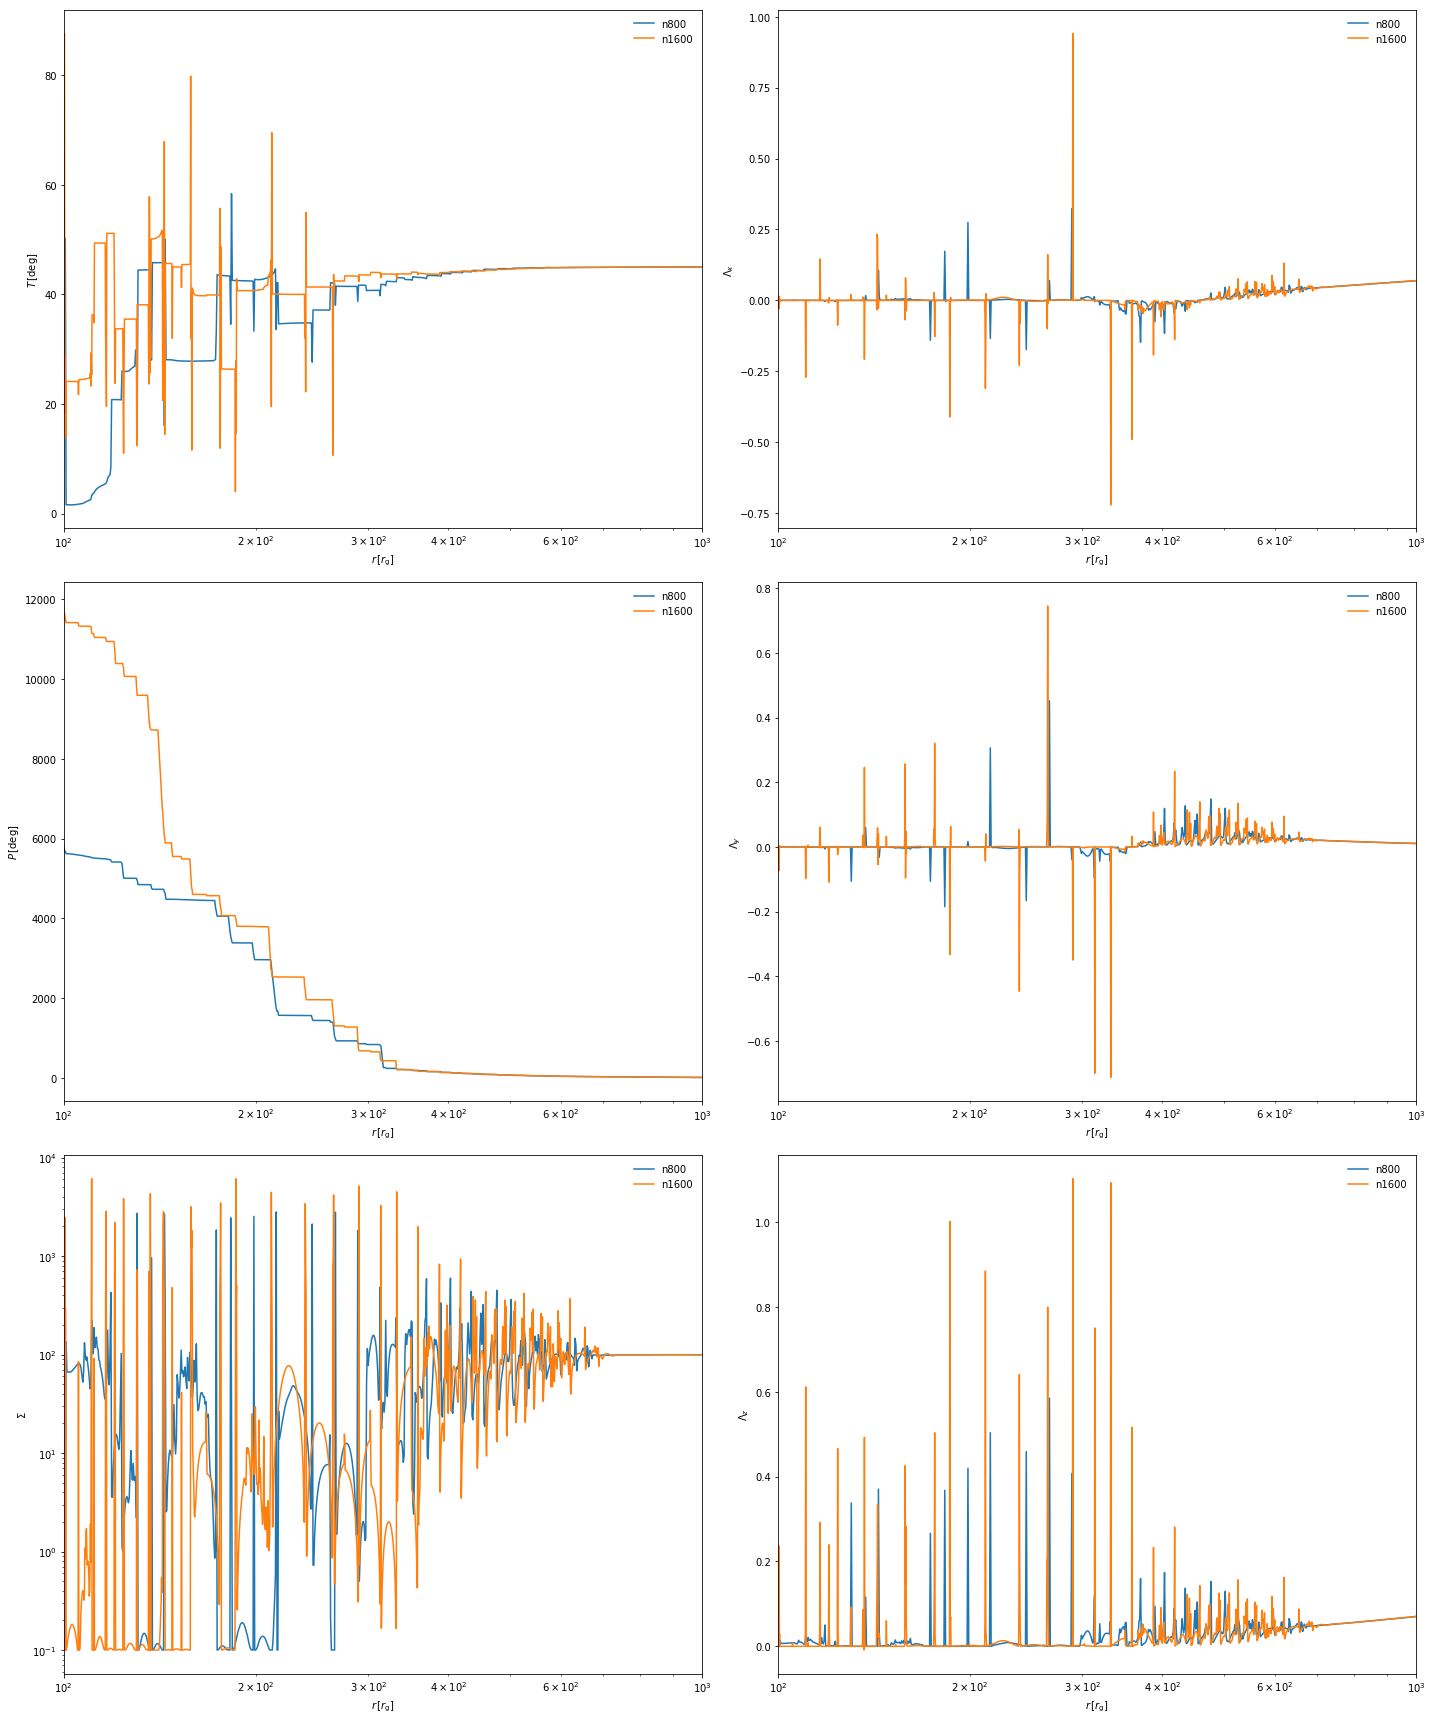

In [72]:
def plot_interface_multi(table,prefixes,time_ind):
    fig, ax = plt.subplots(3,2,figsize=(20,24))
    
    for i,f in enumerate(prefixes):
        plot_r  = table[f][time_ind]["r"]
        plot_d  = table[f][time_ind]["sigma"]
        plot_Lx = table[f][time_ind]["Lx"]
        plot_Ly = table[f][time_ind]["Ly"]
        plot_Lz = table[f][time_ind]["Lz"]
        plot_t  = table[f][time_ind]["tilt"]
        plot_p  = table[f][time_ind]["prec"]

        time   = table[f][time_ind]["t"][0]
        rmin = np.min(plot_r)
        rmax = np.max(plot_r)
        print "simulaton %s at time %e r_g/c" % (f,time)

        ax[0][0].plot(plot_r,plot_t,label=f)
        ax[0][0].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[0][0].set_ylabel(r'$T\,[{\rm deg}]$')
        #ax[0][0].set_ylim(0,2)
        ax[0][0].set_xlim(rmin,rmax)
        ax[0][0].set_xscale('log')
        ax[0][0].legend(frameon=False)

        ax[1][0].plot(plot_r,plot_p,label=f)
        ax[1][0].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][0].set_ylabel(r'$P\,[{\rm deg}]$')
        #ax[1][0].set_ylim(-1e-4,1e-4)
        ax[1][0].set_xlim(rmin,rmax)
        ax[1][0].set_xscale('log')
        ax[1][0].legend(frameon=False)

        ax[2][0].plot(plot_r,plot_d,label=f)
        ax[2][0].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[2][0].set_ylabel(r'$\Sigma$')
        #ax[2][0].set_ylim(-1e-4,1e-4)
        ax[2][0].set_xlim(rmin,rmax)
        ax[2][0].set_xscale('log')
        ax[2][0].set_yscale('log')
        ax[2][0].legend(frameon=False)

        ax[0][1].plot(plot_r,plot_Lx,label=f)
        ax[0][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[0][1].set_ylabel(r'$\Lambda_x$')
        #ax[0][1].set_ylim(0,50000)
        ax[0][1].set_xlim(rmin,rmax)
        ax[0][1].set_xscale('log')
        ax[0][1].legend(frameon=False)
        #ax[0][1].set_yscale('log')

        ax[1][1].plot(plot_r,plot_Ly,label=f)
        ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][1].set_ylabel(r'$\Lambda_y$')
        #ax[1][1].set_ylim(-50,1)
        ax[1][1].set_xlim(rmin,rmax)
        ax[1][1].set_xscale('log')
        ax[1][1].legend(frameon=False)

        ax[2][1].plot(plot_r,plot_Lz,label=f)
        ax[2][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[2][1].set_ylabel(r'$\Lambda_z$')
        #ax[2][1].set_ylim(-1e-3,1e-3)
        ax[2][1].set_xlim(rmin,rmax)
        ax[2][1].set_xscale('log')
        ax[2][1].legend(frameon=False)
        
    return fig
fig = plot_interface_multi(data_dict,prefixes[4:],-1)
plt.tight_layout()
if 0:
    plt.savefig("convergence_tilt45_profiles.pdf")
plt.show()

Unpacking simulation n50 at time 5.584877e+07 r_g/c
Unpacking simulation n100 at time 5.511627e+07 r_g/c
Unpacking simulation n200 at time 5.500139e+07 r_g/c
Unpacking simulation n400 at time 5.500245e+07 r_g/c
Unpacking simulation n800 at time 5.500041e+07 r_g/c

## Reference information for calculating errors ##
Simulation: n50
Grid points: 5.000000e+01
dx: 4.699140e-02
####



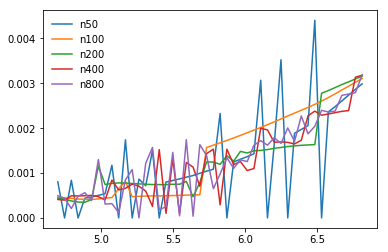


## Calculated error ##
log S        =  [-3.54431365 -3.93096367 -4.14919474 -4.12064933        -inf]
S            =  [0.02888844 0.01962475 0.01577712 0.01623397 0.        ]
sim names    =  ['n50', 'n100', 'n200', 'n400', 'n800']
number cells =  [50, 100, 200, 400, 800]
####


Our fit is -2.809271e-01-th order accurate with error constant 7.845725e-02


[ 50. 100. 200. 400.] [5.64385619 6.64385619 7.64385619 8.64385619]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:100: RuntimeWarning: divide by zero encountered in log2


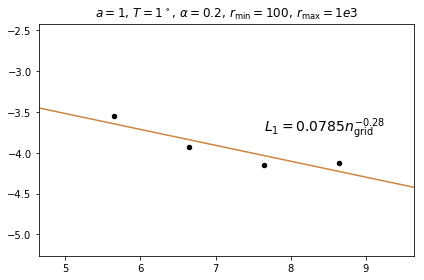

In [69]:
def map_cell_volume(x,field,xmin,xmax):
    dx_base  = xmax - xmin
    dx_high  = np.abs(x[1]-x[0])
    lower_index = np.argmin(np.abs(x-xmin))
    upper_index = np.argmin(np.abs(x-xmax))
    num_cells = upper_index - lower_index + 1
    if (num_cells==1):
        cell_volume = field[lower_index]*dx_high
    if (num_cells>=2):
        x_lower_right = x[lower_index] + dx_high/2.
        W_lower = (x_lower_right - xmin)/dx_base
        x_upper_left  = x[upper_index] - dx_high/2.
        W_upper = (dx_high - (xmax - x_upper_left))/dx_base
        cell_volume = field[lower_index]*W_lower*dx_base + field[upper_index]*W_upper*dx_base
        for i in range(lower_index+1,upper_index): # does nothing if num_cells == 2
            cell_volume += field[i]*dx_high
    return cell_volume

time_index = -1

xs = [] # For each simulation, this is the log(r) array
fs = [] # For each simulation, this is the field array
ns = [] # For each simulation, this is the number of cells
for i,f in enumerate(prefixes):
    print "Unpacking simulation %s at time %e r_g/c" % (f,data_dict[f][time_index]["t"][0])
    xs.append(np.log(data_dict[f][time_index]["r"])) # Take log to convert to internal coordinates
    fs.append(data_dict[f][time_index]["Lz"])        # We can test convergence for Lx, Ly or Lz
    ns.append(len(data_dict[f][time_index]["Lx"]))
    
delta_x = (xs[0][1:] - xs[0][:-1])[0]
num_pts = len(xs[0])
reference_x = np.copy(xs[0])
reference_f = np.copy(fs[0])

print "\n## Reference information for calculating errors ##"
print "Simulation: %s" % prefixes[0]
print "Grid points: %e" % num_pts
print "dx: %e" % delta_x
print "####\n"


# Integrate field over each cell in lowest resolution simulation
solutions = []
for run in range(len(prefixes)): # iterate over simulations to compare to reference simulation
    sol = np.zeros(num_pts-4)
    for i in range(2,num_pts-2):   # iterate over cells, skip guard cells; with outflow BCs, we would be just double counting our outer-most interior cells
        xmin = reference_x[i] - delta_x/2.
        xmax = reference_x[i] + delta_x/2.
        new_cell_volume       = map_cell_volume(xs[run],fs[run],xmin,xmax)
        sol[i-2] = new_cell_volume
    solutions.append(sol)
    plt.plot(reference_x[2:-2],sol,label=prefixes[run])#,s=4)
plt.legend(frameon=False)
plt.show()
plt.clf()

# S will contain our errors
S = np.zeros(len(prefixes))

# Assume that highest resolution run is our solution which others have to measure up against
master_sol = solutions[-1]

# Now calculate errors by measuring difference from master solution
for run in range(len(prefixes)-1):
    sol = solutions[run]
    for i in range(len(sol)):
        S[run] += np.abs(sol[i] - master_sol[i])
# We only care about the absolute magnitude of the error
S = np.abs(S)

print "\n## Calculated error ##"
print "log S        = ", np.log(S)
print "S            = ", S
print "sim names    = ", prefixes
print "number cells = ", ns
print "####\n"

## Lets start making our fit

# We fit in logspace to get a power law
fit_x = np.log(ns[:-1])
fit_y = np.log(S[:-1])
# This assumes a relation "fit_y = m*f_x"; i.e. y-intercept is zero. 
#m = np.linalg.lstsq(fit_x.reshape(-1,1), fit_y)[0][0]
p = np.polyfit(fit_x,fit_y,deg=1)
m = p[0]
b = p[1]

print "\nOur fit is %e-th order accurate with error constant %e\n\n" % (m, np.exp(b))

## Lets plot

# Lambda function for our fit so we can plot
fit = lambda x: m*x + b

plot_x = np.log(np.linspace(0,10000,10000))
plot_y = fit(plot_x)

# Switch from logspace to log2 space so simulations will be evenly spaced
plot_x = np.log2(np.exp(plot_x))
fit_x  = np.log2(np.exp(fit_x))
print 2**fit_x, fit_x

# Now plot!
plt.plot(plot_x,plot_y,color='peru')
plt.scatter(fit_x,fit_y,color='black',s=20,zorder=3)
plt.xlim(fit_x[0] - 1, fit_x[-1] + 1)
plt.text(fit_x[-2],0.9*fit_y[-2],r"$L_1 = %5.4fn_{\rm grid}^{%3.2f}$" % (np.exp(b),m),fontsize=14)
plt.title(r'$a = 1,\,T=1^\circ,\,\alpha=0.2,\,r_{\rm min}=100,\,r_{\rm max}=1e3$')
plt.tight_layout()

# Save figure
if 0:
    plt.savefig("convergence_tilt1_fit.pdf")

In [6]:
print range(2), range(2,2)

[0, 1] []
